In [63]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #for the plots
import OurFunctions as of
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [64]:
ASD_phenotypic_original = pd.read_csv(os.path.join('DataSets','Phenotypic Datasets','ASD_phenotypic.csv'))
ASD_phenotypic = pd.read_csv(os.path.join('DataSets','Phenotypic Datasets','ASD_phenotypic_preprocessed.csv'))
ASD_diagnosis = pd.read_csv(os.path.join('DataSets','Phenotypic Datasets','ASD_clinical.csv'))


# CLASSIFICATION

Some classification algorithms work better with normalized dataset

In [65]:
ASD_phenotypic_normalized = of.normalization(ASD_phenotypic)
ASD_phenotypic_normalized.describe()

,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,ADI_R_VERBAL_TOTAL_BV,ADOS_TOTAL
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.170458,0.118263,0.546949,0.457391,0.577395,0.355675,0.967233
std,0.124868,0.323162,0.171586,0.138591,0.134275,0.226505,0.175455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090189,0.000000,0.429257,0.369787,0.491667,0.181818,0.999351
50%,0.135408,0.000000,0.545963,0.466381,0.583333,0.181818,0.999351
75%,0.209023,0.000000,0.675460,0.554193,0.675000,0.545455,0.999451
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Random Forest

To use the Random Forest classifier, I need to have only numerical features, so we will use one-hot-encoding to turn the categorical features (which aren't ordinal) into numerical features

In [66]:
ASD_phenotypic_encoded = of.One_hot_encoding(ASD_phenotypic)
ASD_phenotypic_encoded

,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,ADI_R_VERBAL_TOTAL_BV,ADOS_TOTAL,SITE_ID_CALTECH,SITE_ID_CMU,SITE_ID_NYU,...,VIQ_TEST_TYPE_STANFORD,VIQ_TEST_TYPE_WAIS,VIQ_TEST_TYPE_WASI,VIQ_TEST_TYPE_WISC,PIQ_TEST_TYPE_DAS,PIQ_TEST_TYPE_RAVENS,PIQ_TEST_TYPE_STANFORD,PIQ_TEST_TYPE_WAIS,PIQ_TEST_TYPE_WASI,PIQ_TEST_TYPE_WISC
0,0.850513,0,0.753797,0.554193,0.758333,0.181818,0.999351,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,0.285590,0,0.541167,0.562975,0.466667,0.590909,0.999301,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,0.568921,0,0.384492,0.220507,0.591667,0.636364,0.999900,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.283852,0,0.529976,0.343444,0.675000,0.363636,0.999500,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.488962,1,0.832134,0.703474,0.708333,0.318182,0.999550,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.080132,1,0.430855,0.372064,0.433333,0.272727,0.999351,False,False,False,...,False,False,False,False,True,False,False,False,False,False
664,0.009213,0,0.509992,0.436460,0.508333,0.863636,0.999351,False,False,False,...,False,False,False,False,True,False,False,False,False,False
665,0.080132,0,0.175859,0.164567,0.191667,0.909091,0.999351,False,False,False,...,False,False,False,False,True,False,False,False,False,False
666,0.052668,1,0.413269,0.336289,0.391667,0.318182,0.999351,False,False,False,...,False,False,False,False,True,False,False,False,False,False


First we split the data into training, validation and testing sets.

In [67]:

# Split the dataset into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(ASD_phenotypic_encoded, ASD_diagnosis, test_size=0.2, random_state=42)

# Split the train+validation set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (400, 35)
Validation set size: (134, 35)
Test set size: (134, 35)


I want to check the balance btw classes for each set

In [68]:
class_counts_test = y_test.value_counts(normalize=True)
class_counts_train = y_train.value_counts(normalize=True)
class_counts_val = y_val.value_counts(normalize=True)

# Stampa il conteggio delle classi per DX_GROUP
print("Class proportions for:")
print("- test set: " + str(class_counts_test))
print("- train set: " + str(class_counts_train))
print("- val set: " + str(class_counts_val))

Class proportions for:
- test set: DX_GROUP
1           0.61194
2           0.38806
Name: proportion, dtype: float64
- train set: DX_GROUP
1           0.6025
2           0.3975
Name: proportion, dtype: float64
- val set: DX_GROUP
1           0.597015
2           0.402985
Name: proportion, dtype: float64


In [69]:
random_clf = RandomForestClassifier(n_estimators=10)
random_clf = random_clf.fit(X_train, y_train)

C:\Users\auran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [70]:
# Use the trained random forest classifier to predict labels for the validation set
y_pred = random_clf.predict(X_val)

# Calculate the accuracy of the classifier on the validation set
accuracy = accuracy_score(y_val, y_pred)

# Print the accuracy
print("Accuracy on the validation set:", accuracy)


Accuracy on the validation set: 0.9402985074626866


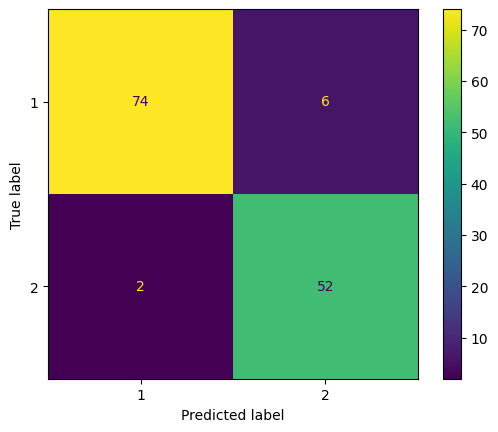

In [71]:
ConfusionMatrixDisplay.from_predictions(y_val, 
                                        y_pred)
plt.show()

In [72]:
y_pred = random_clf.predict(X_test)

# Calculate the accuracy of the classifier on the validation set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy on the testing set:", accuracy)

Accuracy on the testing set: 0.9552238805970149


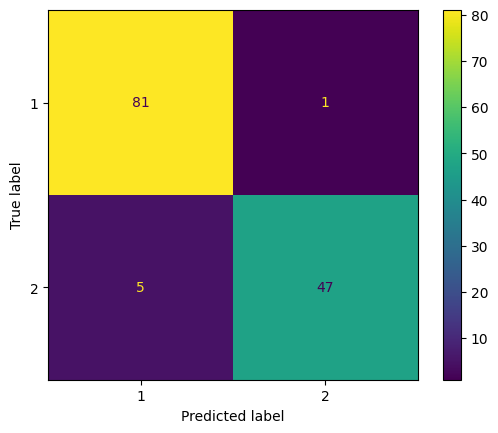

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred)
plt.show()